In [1]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [2]:
# Define the nonlinear function
def nonlinear_function(x):
    return x+np.sin(x)

In [3]:
# Number of arrays
num_arrays = 5000
# Size of each array
array_size = 100

# Initialize the array
data_array = np.zeros((num_arrays, array_size))
# Generate the first array x1
x1 = np.linspace(-100, 100, num_arrays)

data_array[:,0] = x1

# Generate the remaining arrays
for i in range(1, array_size):
    data_array[:,i] = nonlinear_function(data_array[:,i-1])
print(data_array[0:5, 0:5])

[[-100.          -99.49363436  -98.63258453  -97.68576208  -97.39369273]
 [ -99.959992    -99.41954111  -98.52321022  -97.61716719  -97.39133722]
 [ -99.919984    -99.3463128   -98.4199447   -97.56235115  -97.39023361]
 [ -99.879976    -99.27400262  -98.32284565  -97.51915404  -97.38973628]
 [ -99.83996799  -99.20266226  -98.23192005  -97.4855788   -97.3895206 ]]


In [4]:
# Initialize the array
data_array_op = np.zeros((num_arrays, array_size))

data_array_op[:,0:(array_size-1)] = data_array[:,1:array_size]
data_array_op[:,array_size-1] = nonlinear_function(data_array_op[:,array_size-2])

In [5]:
print(data_array_op[0:5, 0:5])

[[-99.49363436 -98.63258453 -97.68576208 -97.39369273 -97.38937227]
 [-99.41954111 -98.52321022 -97.61716719 -97.39133722 -97.38937226]
 [-99.3463128  -98.4199447  -97.56235115 -97.39023361 -97.38937226]
 [-99.27400262 -98.32284565 -97.51915404 -97.38973628 -97.38937226]
 [-99.20266226 -98.23192005 -97.4855788  -97.3895206  -97.38937226]]


In [6]:
# Split the input data into training and testing sets
# Specify the split point
split_point = int(0.8 * num_arrays)

# Split the data into training and testing sets
train_data = data_array[:split_point, :]
test_data = data_array[split_point:, :]

print(train_data[0:5, 0:5])
print(test_data.shape)

[[-100.          -99.49363436  -98.63258453  -97.68576208  -97.39369273]
 [ -99.959992    -99.41954111  -98.52321022  -97.61716719  -97.39133722]
 [ -99.919984    -99.3463128   -98.4199447   -97.56235115  -97.39023361]
 [ -99.879976    -99.27400262  -98.32284565  -97.51915404  -97.38973628]
 [ -99.83996799  -99.20266226  -98.23192005  -97.4855788   -97.3895206 ]]
(1000, 100)


In [7]:
# Split the output data into training and testing sets
train_data_op = data_array_op[:split_point, :]
test_data_op = data_array_op[split_point:, :]

print(train_data_op[0:5, 0:5])
print(test_data_op.shape)

[[-99.49363436 -98.63258453 -97.68576208 -97.39369273 -97.38937227]
 [-99.41954111 -98.52321022 -97.61716719 -97.39133722 -97.38937226]
 [-99.3463128  -98.4199447  -97.56235115 -97.39023361 -97.38937226]
 [-99.27400262 -98.32284565 -97.51915404 -97.38973628 -97.38937226]
 [-99.20266226 -98.23192005 -97.4855788  -97.3895206  -97.38937226]]
(1000, 100)


In [8]:
print(train_data[0:5, 0:5])
print(train_data_op[0:5, 0:5])

[[-100.          -99.49363436  -98.63258453  -97.68576208  -97.39369273]
 [ -99.959992    -99.41954111  -98.52321022  -97.61716719  -97.39133722]
 [ -99.919984    -99.3463128   -98.4199447   -97.56235115  -97.39023361]
 [ -99.879976    -99.27400262  -98.32284565  -97.51915404  -97.38973628]
 [ -99.83996799  -99.20266226  -98.23192005  -97.4855788   -97.3895206 ]]
[[-99.49363436 -98.63258453 -97.68576208 -97.39369273 -97.38937227]
 [-99.41954111 -98.52321022 -97.61716719 -97.39133722 -97.38937226]
 [-99.3463128  -98.4199447  -97.56235115 -97.39023361 -97.38937226]
 [-99.27400262 -98.32284565 -97.51915404 -97.38973628 -97.38937226]
 [-99.20266226 -98.23192005 -97.4855788  -97.3895206  -97.38937226]]


In [9]:
shape=(array_size,)
shape

(100,)

In [11]:
## Making an auto encoder architechture for finding the koopman operator
# Define the encoder
input_layer = Input(shape=(array_size,))
encoded = Dense(256, activation='relu')(input_layer)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded_output = Dense(array_size, activation='relu')(encoded)

# Define linear layers in between
linear_layer = Dense(array_size, activation='linear')(encoded_output)
linear_layer = Dense(units=array_size, activation='linear')(linear_layer)

# Define the decoder with output matching the input shape
decoded = Dense(64, activation='relu')(linear_layer)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)
decoded_output = Dense(array_size, activation='relu')(decoded)

# Combine the encoder and decoder into an autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded_output)

# Extract the encoder model
encoder_model = Model(inputs=input_layer, outputs=encoded_output)

In [12]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 256)               25856     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 100)               6500      
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100 

In [13]:
encoder_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 256)               25856     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 100)               6500      
                                                                 
Total params: 73508 (287.14 KB)
Trainable params: 73508 (287.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Compile the autoencoder model
optimizer = 'Adam'
autoencoder.compile(optimizer=optimizer, loss='mean_squared_error')

In [15]:
# Train the autoencoder
num_epochs = 25
batch_size = 32

autoencoder.fit(train_data, train_data_op, epochs=num_epochs, batch_size=batch_size, validation_data=(test_data, test_data_op))

Epoch 1/25
125/125 [==============================] - 2s 5ms/step - loss: 2276.3938 - val_loss: 2544.3831
Epoch 2/25
125/125 [==============================] - 0s 4ms/step - loss: 2260.3953 - val_loss: 2544.3738
Epoch 3/25
125/125 [==============================] - 1s 4ms/step - loss: 2260.3953 - val_loss: 2544.4006
Epoch 4/25
125/125 [==============================] - 1s 5ms/step - loss: 2260.3955 - val_loss: 2544.3962
Epoch 5/25
125/125 [==============================] - 1s 4ms/step - loss: 2260.3953 - val_loss: 2544.3835
Epoch 6/25
125/125 [==============================] - 1s 4ms/step - loss: 2260.3953 - val_loss: 2544.3870
Epoch 7/25
125/125 [==============================] - 0s 4ms/step - loss: 2260.4023 - val_loss: 2544.3796
Epoch 8/25
125/125 [==============================] - 1s 4ms/step - loss: 2260.4299 - val_loss: 2545.8730
Epoch 9/25
125/125 [==============================] - 1s 5ms/step - loss: 2260.4500 - val_loss: 2544.4199
Epoch 10/25
125/125 [=========================

In [16]:
# Encode the data into lower dimension
encoded_data = encoder_model.predict(data_array)

# Print the shape of the encoded data as the input of the linear layer
print("Shape of encoded data:", encoded_data.shape)

157/157 [==============================] - 0s 1ms/step
Shape of encoded data: (5000, 100)


In [17]:
encoded_data

array([[ 16.403625 ,   0.       ,  13.11579  , ...,  47.513237 ,
          0.       ,   0.       ],
       [ 16.399876 ,   0.       ,  13.113583 , ...,  47.513733 ,
          0.       ,   0.       ],
       [ 16.396395 ,   0.       ,  13.111646 , ...,  47.513992 ,
          0.       ,   0.       ],
       ...,
       [259.51788  ,   0.       ,   6.5843005, ...,   0.       ,
        179.84688  ,   0.       ],
       [259.52878  ,   0.       ,   6.588547 , ...,   0.       ,
        179.85014  ,   0.       ],
       [259.5407   ,   0.       ,   6.5931435, ...,   0.       ,
        179.8535   ,   0.       ]], dtype=float32)

In [18]:
# Extract the linear model from the model autoencoder to find out the weights
linear_model = Model(inputs=encoded_output, outputs=linear_layer)
linear_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
Total params: 20200 (78.91 KB)
Trainable params: 20200 (78.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Size of each array
array_size = array_size
# Initialize the array
lin_array = np.zeros((num_arrays, array_size))
# Generate the first array x1
x1 = np.linspace(-3*np.pi, 3*np.pi, num_arrays)

lin_array[:,0] = x1

# Generate the remaining arrays
for i in range(1, array_size):
    lin_array[:,i] = nonlinear_function(lin_array[:,i-1])
print(lin_array.shape)

# Initialize the array
lin_array_op = np.zeros((num_arrays, array_size))
lin_array_op[:,0:array_size-1] = lin_array[:,1:array_size]
lin_array_op[:,array_size-1] = nonlinear_function(lin_array_op[:,array_size-2])

# Encode the data into lower dimension
linear_data = linear_model.predict(lin_array)

# Print the shape of the encoded data
print("Shape of linear data:", linear_data.shape)

(5000, 100)
157/157 [==============================] - 0s 1ms/step
Shape of linear data: (5000, 100)


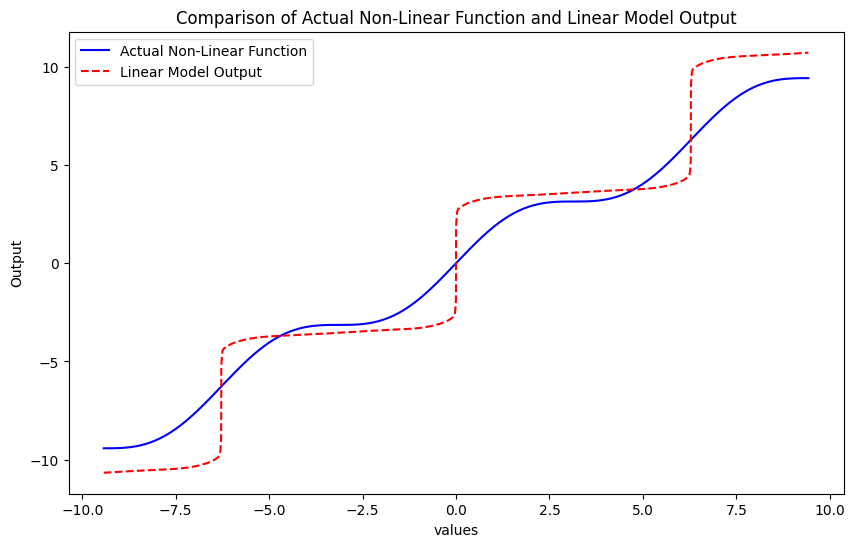

In [45]:
# Plot the actual non-linear function and the linear model's output
import matplotlib.pyplot as plt

i=0
plt.figure(figsize=(10, 6))
plt.plot(lin_array[:,i], lin_array_op[:,i], label='Actual Non-Linear Function', color='blue')
plt.plot(lin_array[:,i], linear_data[:,i], label='Linear Model Output', linestyle='dashed', color='red')
plt.title('Comparison of Actual Non-Linear Function and Linear Model Output')
plt.xlabel('values')
plt.ylabel('Output')
plt.legend()
plt.show()

In [26]:
koopman_operator = linear_model.get_weights()
print(koopman_operator)

[array([[ 0.13183057, -0.13001366,  0.01786576, ..., -0.13131349,
        -0.00044146, -0.08633948],
       [-0.04580077, -0.08297091,  0.09217127, ..., -0.02074719,
        -0.12188008,  0.10889303],
       [-0.14240827, -0.14140967, -0.08515951, ...,  0.13554852,
         0.12440833, -0.08389539],
       ...,
       [-0.13085744, -0.15008652,  0.04150895, ..., -0.0650198 ,
         0.04602874, -0.04054699],
       [ 0.02550942,  0.00060348, -0.11395479, ..., -0.10909653,
         0.12352225, -0.11015955],
       [ 0.09563655,  0.00739688,  0.10268835, ..., -0.00722825,
        -0.10020103,  0.15944295]], dtype=float32), array([ 0.00522848,  0.01182333,  0.01105047,  0.00371516,  0.01825727,
        0.00528373,  0.01087973,  0.0037959 ,  0.00536486, -0.00097181,
       -0.01764757, -0.01719809, -0.00141231,  0.01020298,  0.00822527,
       -0.00302311, -0.00371793, -0.0070655 , -0.00036187,  0.00717531,
        0.00464839, -0.00364766, -0.00366432,  0.00541219,  0.00847334,
       -0.

In [42]:
i=0
xt = lin_array[:,i]
yt = lin_array_op[:,i]
ypred = linear_data[:,i]

In [43]:
# Calculate Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(yt,ypred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(yt,ypred)
print(f'R-squared: {r2}')

Mean Squared Error: 2.3222552404849868
R-squared: 0.9277009990919212


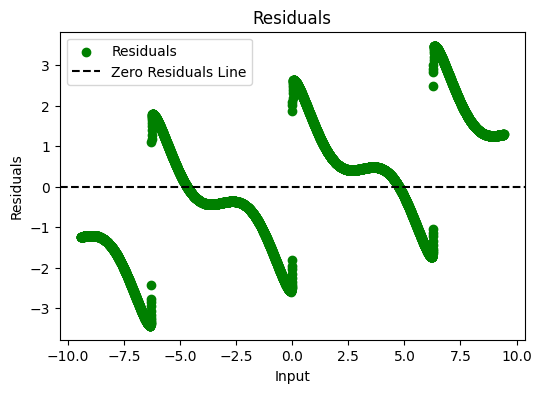

In [44]:
# Plot Residuals
residuals = ypred - yt
plt.figure(figsize=(6, 4))
plt.scatter(xt, residuals, label='Residuals', color='green')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Residuals Line')
plt.title('Residuals')
plt.xlabel('Input')
plt.ylabel('Residuals')
plt.legend()

In [22]:
# Get and save all model weights
weights_path = 'autoencodermodel_weights.h5'
autoencoder.save_weights(weights_path)

weights_path = 'linearmodel_weights.h5'
linear_model.save_weights(weights_path)

In [23]:
# Specify the file path where you want to save the array
file_path = 'lin_array.npy'
np.save(file_path, lin_array)
file_path = 'lin_array_op.npy'
np.save(file_path, lin_array_op)
file_path = 'linear_data.npy'
np.save(file_path, linear_data)